In [71]:
import pandas as pd
from pathlib import Path
import seaborn as sns

In [72]:
data_path = Path.cwd().parent / "data" / "raw" / "IMDB.csv"
save_path = Path.cwd().parent / "data" / "data.csv"

In [73]:
df = pd.read_csv(data_path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [74]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

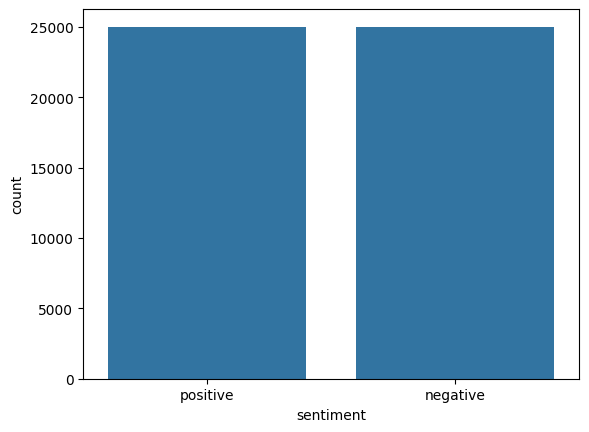

In [75]:
sns.countplot(data = df , x = "sentiment")

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [77]:
pos_df = df[df["sentiment"] == "positive"]
neg_df = df[df["sentiment"] == "negative"]

In [78]:
assert len(pos_df) >= 500 and len(neg_df) >= 500, "Not enough samples in one class"

In [79]:
sampled_df = pd.concat([pos_df.sample(n=500, random_state=42),neg_df.sample(n=500, random_state=42)] , axis = 0).sample(frac=1, random_state=42).reset_index(drop=True)


In [80]:
sampled_df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [81]:
sampled_df.head()

,review,sentiment
0,Bad. Personal opinion? The folks who made it? ...,negative
1,This movie is obviously low-budget & filmed in...,positive
2,"Yes, this movie has kids going to space camp a...",negative
3,"Before I begin, let me tell you how GREAT this...",positive
4,The Vampire Bat is set in the small German vil...,negative


In [82]:
sampled_df['sentiment'].value_counts()

sentiment
negative    500
positive    500
Name: count, dtype: int64

In [83]:
sampled_df.to_csv(save_path , index = False)